In [ ]:
# Ensure TensorFlow is installed
# !pip install tensorflow
# !pip install matplotlib
# !pip install opencv-python
# !pip install opencv-python-headless
# !pip install tensorflow-addons
# !pip install tensorflow-datasets
# !pip install tensorflow-hub
# !pip install tensorflow-io
# !pip install tensorflow-text
# !pip install tensorflow-privacy
# !pip install tensorflow-probability
# !pip install tensorflow-models-official

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow import keras
import matplotlib.pyplot as plt


^C
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'tensorflow.python'

  Using cached absl_py-2.2.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached h5py-3.13.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using

In [ ]:
import os

# Define the local dataset directory
source = r"C:\Users\shind\Downloads\skinerce"
# Define paths for each category
sourceAcnes = os.path.join(source, 'acnes')
sourceBlackheads = os.path.join(source, 'blackheads')
sourceDarkSpots = os.path.join(source, 'darkspots')
sourceWrinkles = os.path.join(source, 'wrinkles')

# Count and print the number of images in each category
print(f"There are {len(os.listdir(sourceAcnes))} images of acnes.")
print(f"There are {len(os.listdir(sourceBlackheads))} images of blackheads.")
print(f"There are {len(os.listdir(sourceDarkSpots))} images of darkspots.")
print(f"There are {len(os.listdir(sourceWrinkles))} images of wrinkles.")


There are 999 images of acnes.
There are 150 images of blackheads.
There are 303 images of darkspots.
There are 300 images of wrinkles.


In [ ]:
import os
import shutil

# Define root directory
root_dir = r"C:\Users\shind\Downloads\skinerce\skinmate"

# Empty directory to prevent FileExistsError if the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

# Create train and validation directories
def create_train_val_dirs(root_path):
    # train and validation directories for skin-case
    train_dir = os.path.join(root_dir, 'training')
    os.makedirs(train_dir, exist_ok=True)
    val_dir = os.path.join(root_dir, 'validation')
    os.makedirs(val_dir, exist_ok=True)

    # train directories for acnes
    train_acnes_dir = os.path.join(train_dir, 'acnes')
    os.makedirs(train_acnes_dir, exist_ok=True)
    # train directories for blackheads
    train_blackheads_dir = os.path.join(train_dir, 'blackheads')
    os.makedirs(train_blackheads_dir, exist_ok=True)
    # train directories for darkspots
    train_darkspots_dir = os.path.join(train_dir, 'darkspots')
    os.makedirs(train_darkspots_dir, exist_ok=True)
    # train directories for wrinkles
    train_wrinkles_dir = os.path.join(train_dir, 'wrinkles')
    os.makedirs(train_wrinkles_dir, exist_ok=True)

    # validation directories for acnes
    val_acnes_dir = os.path.join(val_dir, 'acnes')
    os.makedirs(val_acnes_dir, exist_ok=True)
    # validation directories for blackheads
    val_blackheads_dir = os.path.join(val_dir, 'blackheads')
    os.makedirs(val_blackheads_dir, exist_ok=True)
    # validation directories for darkspots
    val_darkspots_dir = os.path.join(val_dir, 'darkspots')
    os.makedirs(val_darkspots_dir, exist_ok=True)
    # validation directories for wrinkles
    val_wrinkles_dir = os.path.join(val_dir, 'wrinkles')
    os.makedirs(val_wrinkles_dir, exist_ok=True)

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

    #Print all directories
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

C:\Users\manas\Downloads\skinerce\skinmate\training
C:\Users\manas\Downloads\skinerce\skinmate\validation
C:\Users\manas\Downloads\skinerce\skinmate\training\acnes
C:\Users\manas\Downloads\skinerce\skinmate\training\blackheads
C:\Users\manas\Downloads\skinerce\skinmate\training\darkspots
C:\Users\manas\Downloads\skinerce\skinmate\training\wrinkles
C:\Users\manas\Downloads\skinerce\skinmate\validation\acnes
C:\Users\manas\Downloads\skinerce\skinmate\validation\blackheads
C:\Users\manas\Downloads\skinerce\skinmate\validation\darkspots
C:\Users\manas\Downloads\skinerce\skinmate\validation\wrinkles


In [ ]:
# Test your split_data function

# Define paths
ACNES_SOURCE_DIR = r"C:\Users\shind\Downloads\skinerce\dataset1\acnes"
BLACKHEADS_SOURCE_DIR = r"C:\Users\shind\Downloads\skinerce\dataset1\blackheads"
DARKSPOTS_SOURCE_DIR = r"C:\Users\shind\Downloads\skinerce\dataset1\darkspots"
WRINKLES_SOURCE_DIR = r"C:\Users\shind\Downloads\skinerce\dataset1\wrinkles"

TRAINING_DIR = r"C:\Users\shind\Downloads\skinerce\skinmate\training"
VALIDATION_DIR = r"C:\Users\shind\Downloads\skinerce\skinmate\validation"

TRAINING_ACNES_DIR = os.path.join(TRAINING_DIR, "acnes/")
VALIDATION_ACNES_DIR = os.path.join(VALIDATION_DIR, "acnes/")

TRAINING_BLACKHEADS_DIR = os.path.join(TRAINING_DIR, "blackheads/")
VALIDATION_BLACKHEADS_DIR = os.path.join(VALIDATION_DIR, "blackheads/")

TRAINING_DARKSPOTS_DIR = os.path.join(TRAINING_DIR, "darkspots/")
VALIDATION_DARKSPOTS_DIR = os.path.join(VALIDATION_DIR, "darkspots/")

TRAINING_WRINKLES_DIR = os.path.join(TRAINING_DIR, "wrinkles/")
VALIDATION_WRINKLES_DIR = os.path.join(VALIDATION_DIR, "wrinkles/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_WRINKLES_DIR)) > 0:
  for file in os.scandir(TRAINING_WRINKLES_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_WRINKLES_DIR)) > 0:
  for file in os.scandir(VALIDATION_WRINKLES_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

In [ ]:
import os
import random
from shutil import copyfile

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE_DIR):
        file = os.path.join(SOURCE_DIR, filename)  # Fix: Use os.path.join
        if not os.path.exists(file):  # Check if the file exists
            print(f"File not found: {file}")
            continue
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(f"Zero-length file: {file}")

    # Shuffle and split the files
    training_size = int(len(files) * SPLIT_SIZE)
    validation_size = int(len(files) - training_size)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_size]
    validation_set = shuffled_set[training_size:]

    # Copy files to training and validation directories
    for filename in training_set:
        src_file = os.path.join(SOURCE_DIR, filename)
        dest_file = os.path.join(TRAINING_DIR, filename)
        copyfile(src_file, dest_file)

    for filename in validation_set:
        src_file = os.path.join(SOURCE_DIR, filename)
        dest_file = os.path.join(VALIDATION_DIR, filename)
        copyfile(src_file, dest_file)

    print(f"Split complete: {len(training_set)} training files, {len(validation_set)} validation files.")

In [ ]:
# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(ACNES_SOURCE_DIR, TRAINING_ACNES_DIR, VALIDATION_ACNES_DIR, split_size)
split_data(BLACKHEADS_SOURCE_DIR, TRAINING_BLACKHEADS_DIR, VALIDATION_BLACKHEADS_DIR, split_size)
split_data(DARKSPOTS_SOURCE_DIR, TRAINING_DARKSPOTS_DIR, VALIDATION_DARKSPOTS_DIR, split_size)
split_data(WRINKLES_SOURCE_DIR, TRAINING_WRINKLES_DIR, VALIDATION_WRINKLES_DIR, split_size)

print(f"\n\nOriginal acne's directory has {len(os.listdir(ACNES_SOURCE_DIR))} images")
print(f"\n\nOriginal blackhead's directory has {len(os.listdir(BLACKHEADS_SOURCE_DIR))} images")
print(f"\n\nOriginal darkspot's directory has {len(os.listdir(DARKSPOTS_SOURCE_DIR))} images")
print(f"\n\nOriginal winkle's directory has {len(os.listdir(WRINKLES_SOURCE_DIR))} images")
print(f"\n\nThere are {len(os.listdir(TRAINING_WRINKLES_DIR))} images of acnes for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_WRINKLES_DIR))} images of acnes for validation")
print(f"\n\nThere are {len(os.listdir(TRAINING_BLACKHEADS_DIR))} images of blackheads for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_BLACKHEADS_DIR))} images of blackheads for validation")
print(f"\n\nThere are {len(os.listdir(TRAINING_DARKSPOTS_DIR))} images of darkspots for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_DARKSPOTS_DIR))} images of darkspots for validation")
print(f"\n\nThere are {len(os.listdir(TRAINING_WRINKLES_DIR))} images of wrinkles for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_WRINKLES_DIR))} images of wrinkles for validation")

Split complete: 799 training files, 200 validation files.
Split complete: 120 training files, 30 validation files.
Split complete: 242 training files, 61 validation files.
Split complete: 240 training files, 60 validation files.


Original acne's directory has 999 images


Original blackhead's directory has 150 images


Original darkspot's directory has 303 images


Original winkle's directory has 300 images


There are 240 images of acnes for training


There are 60 images of acnes for validation


There are 120 images of blackheads for training


There are 30 images of blackheads for validation


There are 242 images of darkspots for training


There are 61 images of darkspots for validation


There are 240 images of wrinkles for training


There are 60 images of wrinkles for validation


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1401 images belonging to 4 classes.
Found 351 images belonging to 4 classes.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 90.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.90):
      print("\nReached 90.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:

def create_model():

  model = tf.keras.models.Sequential([
      # Conv2D and MaxPooling2D layers
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),

      #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      #tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      #tf.keras.layers.MaxPooling2D(2,2),


      tf.keras.layers.Flatten(),

      #tf.keras.layers.Dropout(0.2),

      #tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(4, activation='sigmoid')
  ])


  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['acc'])

  return model

In [ ]:
# Get the untrained model
model = create_model()

model.summary()

C:\Users\manas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,527,140 (36.34 MB)

 Trainable params: 9,527,140 (36.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=50,
                    verbose=2,
                    validation_data=validation_generator,
                    callbacks=callbacks)

C:\Users\manas\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
44/44 - 32s - 738ms/step - acc: 0.7095 - loss: 0.2792 - val_acc: 0.7407 - val_loss: 0.2079
Epoch 2/50
44/44 - 33s - 743ms/step - acc: 0.7637 - loss: 0.2093 - val_acc: 0.7664 - val_loss: 0.2075
Epoch 3/50
44/44 - 38s - 858ms/step - acc: 0.7916 - loss: 0.2057 - val_acc: 0.7635 - val_loss: 0.2045
Epoch 4/50
44/44 - 18s - 414ms/step - acc: 0.7816 - loss: 0.2041 - val_acc: 0.8120 - val_loss: 0.2187
Epoch 5/50
44/44 - 18s - 400ms/step - acc: 0.8101 - loss: 0.1928 - val_acc: 0.8063 - val_loss: 0.2051
Epoch 6/50
44/44 - 23s - 515ms/step - acc: 0.8273 - loss: 0.1861 - val_acc: 0.8063 - val_loss: 0.2118
Epoch 7/50
44/44 - 21s - 470ms/step - acc: 0.8287 - loss: 0.1827 - val_acc: 0.8348 - val_loss: 0.1891
Epoch 8/50
44/44 - 18s - 410ms/step - acc: 0.8365 - loss: 0.1794 - val_acc: 0.8291 - val_loss: 0.1865
Epoch 9/50
44/44 - 20s - 444ms/step - acc: 0.8351 - loss: 0.1718 - val_acc: 0.8205 - val_loss: 0.1855
Epoch 10/50
44/44 - 20s - 447ms/step - acc: 0.8380 - loss: 0.1695 - val_acc: 0.826

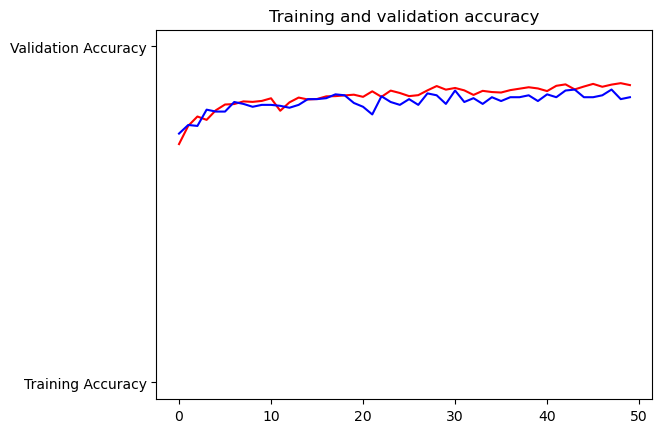

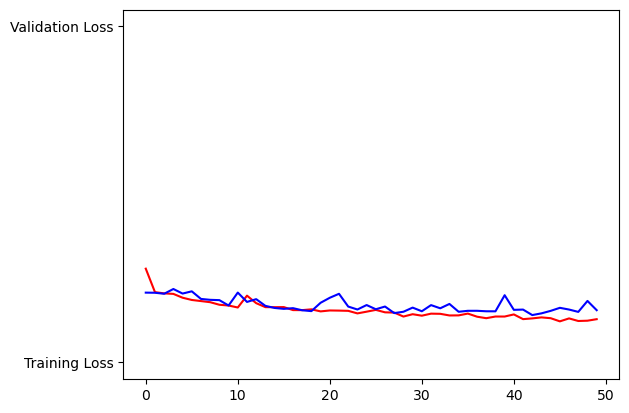

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:

# Save the model architecture in JSON format
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights in H5 format
model.save("skinmate_model1.h5")
